In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import subprocess
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Fijamos el directorio de trabjo
directorio = '/Users/leonardorebollarruelas/Documents/GitHub/Implementaci-n-de-modelos-SARIMA'
os.chdir(directorio)

In [3]:
# Corremos el proceso que importa las series de tiempo de INEGI
dir_gen_series_INEGI = '/Users/leonardorebollarruelas/Documents/GitHub/Privado-Leo/Generador de Series INEGI.py'
subprocess.run(["python3",dir_gen_series_INEGI], check=True)

CompletedProcess(args=['python3', '/Users/leonardorebollarruelas/Documents/GitHub/Privado-Leo/Generador de Series INEGI.py'], returncode=0)

In [4]:
# Importamos el diccionario con las series de tiempo recien actualizado
with open("series_INEGI.pkl", "rb") as f:
    dict_series_INEGI = pickle.load(f)

In [5]:
# Base de Inflación
db_inpc = dict_series_INEGI['INPC_general']
db_inpc['inflacion_YoY'] = db_inpc['INPC_general'].pct_change(12)*100 # Calcula el cambio porcentual de una variable
db_inpc_contempo = db_inpc[db_inpc['fecha'] >= '2004-01-01']
db_inpc_contempo = db_inpc_contempo.set_index('fecha')

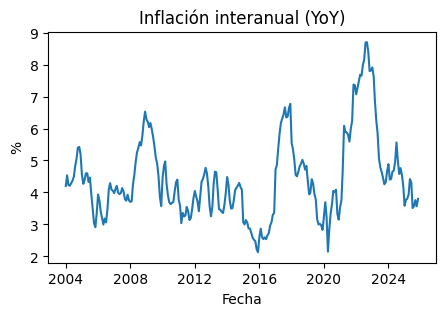

In [6]:
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(db_inpc_contempo['inflacion_YoY'])
ax.set_title("Inflación interanual (YoY)")
ax.set_ylabel("%")
ax.set_xlabel("Fecha")
plt.show()

In [ ]:
# Función de autocorrelación
acf = sm.tsa.acf(db_inpc_contempo['inflacion_YoY'])

# Función de autocorrelación
pacf = sm.tsa.pacf(db_inpc_contempo['inflacion_YoY'])

X = list(range(0,len(acf)))


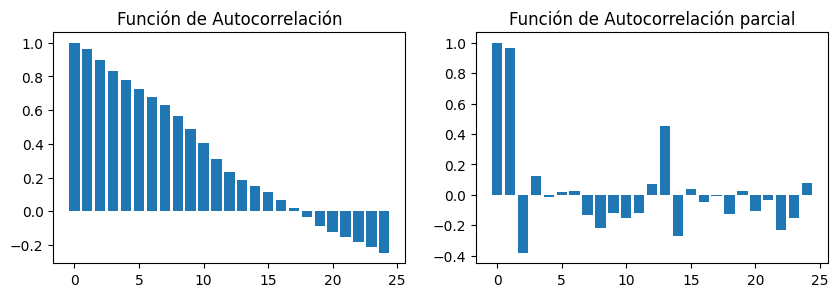

In [40]:
fig, ax = plt.subplots(ncols=2, figsize = (10,3))
## Gráfico de la función de autocorrelación
ax[0].bar(X, acf)
ax[0].set_title("Función de Autocorrelación")
## Gráfico de la función de autocorrelación parcial
ax[1].bar(X, pacf)
ax[1].set_title("Función de Autocorrelación parcial")
plt.show()

In [21]:
#Pruebas de raíz unitaría 
## Prueba de Dickey - Fuller
### H0: Y_t Existe una raíz unitaria (la serie no es estacionaria). 
DF_t = sm.tsa.adfuller(db_inpc_contempo['inflacion_YoY'])[0]
DF_t_pv = sm.tsa.adfuller(db_inpc_contempo['inflacion_YoY'])[1]

#### Resultados de la prueba de DF
if DF_t_pv < 0.05:
    r_df = f"""La prueba Dickey - Fuller rechazó la hipótesis nula, por tanto, no existe la posibilidad de que en niveles existiera raíz hunitaria,
            por lo que la seríe es estacionaria con P-value: {round(DF_t_pv, 6)}."""
            
    opcion_df = 1
    
else:
    r_df = f"""
            No existe evidencia estadística para rechazar la existencia de una raíz unitaria en niveles, por tanto es una serie
            no estacionaria con un P-value: {round(DF_t_pv, 6)}."""
            
    opcion_df = 2

## Prueba de Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
### H0: Y_t está en niveles o tiene una tendencia estacionaria
KPSS_t = sm.tsa.kpss(db_inpc_contempo['inflacion_YoY'])[0]
KPSS_t_pv = sm.tsa.kpss(db_inpc_contempo['inflacion_YoY'])[1]
### La relación de ambas hipótesis es inversa, portanto al rechazar DF y no rechazar KPSS nuestra serie será no estacionaria.

#### Resultados de la prueba de KPSS
if KPSS_t_pv >= 0.05:
    r_kpss = f"""La prueba Kwiatkowski-Phillips-Schmidt-Shin muestra que no hay evidencia para esta serie de tiempo en niveles para rechazar la Hipótesis 
                 nula, mostrando que esta tiene una tendencia estacionaria, con P-value: {round(KPSS_t_pv, 6)}."""
                 
    opcion_kpss = 1
    
else:
    r_kpss = f"""
            Existe evidencia estadística para rechazar la hipótesis nula de existencia de estacionariedad en niveles, 
            con un P-value: {round(DF_t_pv, 6)}."""
            
    opcion_kpss = 2


r_global = np.where((opcion_df & opcion_kpss) == 1, "Serie estacionaria", 
                    np.where((opcion_df & opcion_kpss) == 2, "Serie no estacionaria", "Validar manualmente"))

print(f"""
      Los resultados fueron:
      
      DICKEY - FULLER: {r_df}
      
      KPSS: {r_kpss}
      
      {r_global}
      
      """)


      Los resultados fueron:
      
      DICKEY - FULLER: La prueba Dickey - Fuller rechazó la hipótesis nula, por tanto, no existe la posibilidad de que en niveles existiera raíz hunitaria,
            por lo que la seríe es estacionaria con P-value: 0.030318.
      
      KPSS: La prueba Kwiatkowski-Phillips-Schmidt-Shin muestra que no hay evidencia para esta serie de tiempo en niveles para rechazar la Hipótesis 
                 nula, mostrando que esta tiene una tendencia estacionaria, con P-value: 0.1.
      
      Serie estacionaria
      
      


/var/folders/rq/wq_v_pnx09gcg6kx9zf0xdh40000gn/T/ipykernel_40514/575956505.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPSS_t = sm.tsa.kpss(db_inpc_contempo['inflacion_YoY'])[0]
/var/folders/rq/wq_v_pnx09gcg6kx9zf0xdh40000gn/T/ipykernel_40514/575956505.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPSS_t_pv = sm.tsa.kpss(db_inpc_contempo['inflacion_YoY'])[1]
